<a href="https://colab.research.google.com/github/jadsoncastro/CalculoNumerico/blob/main/REAT/REAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

# Método da bisseção

In [ ]:
def bissecao(funcao, inicio, fim, eps=0.001, numIteracoes=10):
  
  cont = 0
  a=inicio
  b=fim
  erro = float('inf')

  print("Bissecao: Numero aproximado de iteracoes: %.4f" % ((math.log10(b-a)-math.log10(eps))/math.log10(2)) )

  #print("k \t\t ak \t\t bk \t\t xk \t\t f(xk) \t\t abs(b-a) \t\t f(a)*f(xk) < 0")

  while cont < numIteracoes and erro >=eps:
    x =(a+b)/2
    print("k=%d \t a%d=%.4f \t b%d=%.4f \t x%d=%.4f \t f(x%d)=%.4f \t |b-a|=%.4f \t f(a)*f(x%d) < 0? %s" %(cont, cont, a, cont, b, cont, x, cont, funcao(x), abs(b-a), cont, funcao(a)*funcao(x)<0 ))
    
    if funcao(x)==0: # Entao ela eh uma raiz
      return x
    
    if funcao(a)*funcao(x) < 0:
      #print("atualizando b")
      b = x
    else:
      #print("atualizando a")
      a = x

    erro= abs(b-a)
    # print("k=%d \t a%d=%.4f \t b%d=%.4f \t x%d=%.4f \t f(x%d)=%.4f \t |b-a|=%.4f \t f(a)*f(x%d) < 0? %s" %(cont, cont, a, cont, b, cont, x, cont, funcao(x), abs(b-a), cont, funcao(a)*funcao(x)<0 ))
    cont+=1

  
  return x

#Método da falsa posição

In [ ]:
def falsaPosicao(funcao, inicio, fim, eps=0.001, numIteracoes=10):
  
  cont = 1
  a=inicio
  b=fim
  erro = float('inf')

  while cont <= numIteracoes and erro >=eps:
    x = (a*funcao(b) - b*funcao(a)) / (funcao(b) - funcao(a))
    
    if funcao(x)==0: # Entao ela eh uma raiz
      return x
    
    if funcao(a)*funcao(x) < 0:
      #print("atualizando b")
      b = x
    else:
      #print("atualizando a")
      a = x

    erro= abs(funcao(x))
    print("k=%d \t a%d=%.4f \t b%d=%.4f \t x%d=%.4f \t f(x%d)=%.4f \t |f(x%d)|=%.4f \t f(a)*f(x%d) < 0? %s" %(cont, cont, a, cont, b, cont, x, cont, funcao(x), cont, abs(funcao(x)), cont, funcao(a)*funcao(x)<0 ))
    cont+=1

  
  return x

#Método de Newton Raphson

In [ ]:
def newtonRaphson(funcao, funcaoDerivada, segDerivada, a, b, eps=0.001, numIteracoes=10):
  
  #print("a", funcaoDerivada(a), segDerivada(a))
  #print("b", funcaoDerivada(b), segDerivada(b))

  x=0
  if funcaoDerivada(a)*segDerivada(a) > 0:
    x=a
  elif funcaoDerivada(b)*segDerivada(b) > 0:
    x=b
  else:
    print("Newton Raphson.\nNao foi possivel definir o valor de x0 utilizando os extremos do intervalo dado.\nNao foi atendida a expressao f\'(x)*f\'\'(x)>0\nTente novamente")
    return

  k = 1
  erro = float('inf')
  print("Newton Raphson: Valor inicial para o metodo:  %.4f" % x)

  #print("k \t\t ak \t\t bk \t\t xk \t\t f(xk) \t\t abs(f(xk)) \t\t f(a)*f(xk) < 0")

  while k <= numIteracoes and erro >=eps:
    xNew = x - (funcao(x)/funcaoDerivada(x))
    erro = abs(xNew-x)
    print("k=%d \t x%d=%.4f \t f(x%d)=%.4f \t f\'(x%d)=%.4f \t |x%d - x%d|=%.4f" % (k, k, xNew, k, funcao(xNew), k, funcaoDerivada(xNew), k, k-1, erro) )

    x= xNew
    k+=1
  
  return x

# Execução dos métodos

## Questão 1A
$f(x) = 2x^3-5x^2-x+3$

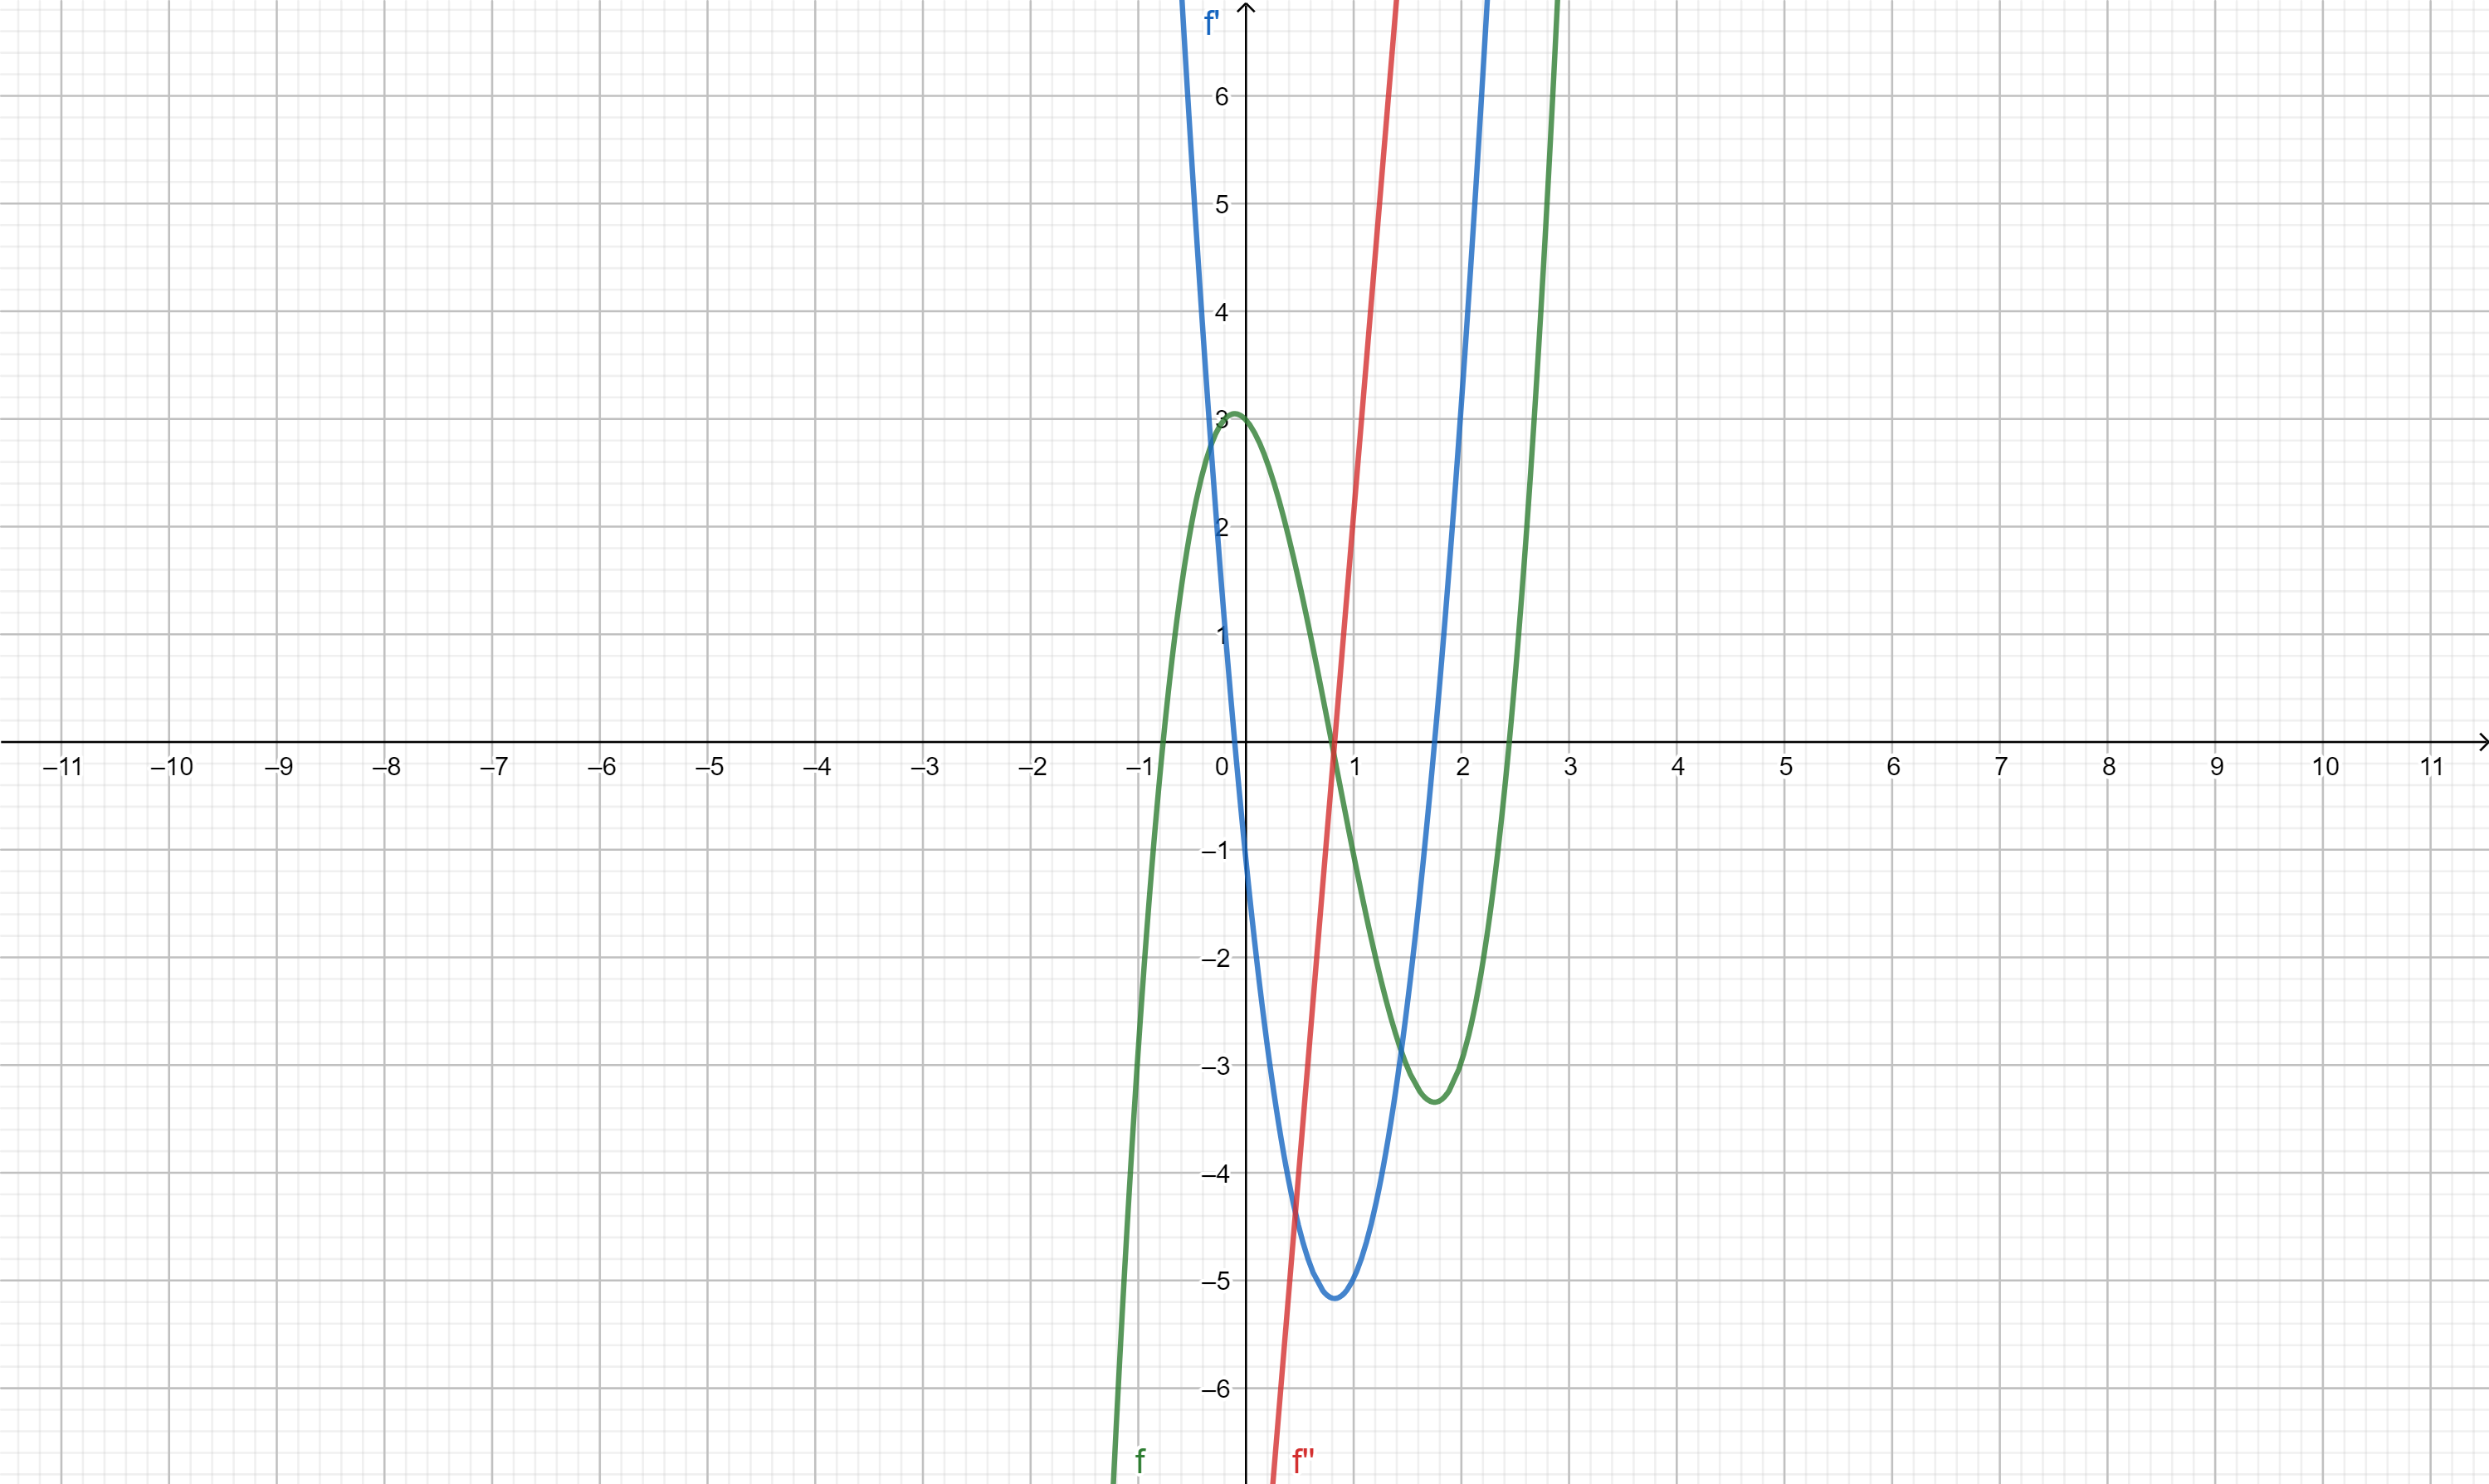

In [ ]:
def funcaoExecucao(x):
  return 2*x**3 - 5*x**2 -x +3

def derivadaFuncao(x):
  return 6*x**2 - 10*x - 1

def segundaDerivada(x):
  return 12*x-10

In [ ]:
a = 2
b = 3

In [ ]:
resultado = bissecao(funcaoExecucao, a, b, eps=0.0001, numIteracoes=100)
print("Bissecao.\nRaiz da funcao bissecao =  %.4f, f(%.4f)=%.4f" %(resultado, resultado, funcaoExecucao(resultado))) 

Bissecao: Numero aproximado de iteracoes: 13.2877
k=0 	 a0=2.0000 	 b0=3.0000 	 x0=2.5000 	 f(x0)=0.5000 	 |b-a|=1.0000 	 f(a)*f(x0) < 0? True
k=1 	 a1=2.0000 	 b1=2.5000 	 x1=2.2500 	 f(x1)=-1.7812 	 |b-a|=0.5000 	 f(a)*f(x1) < 0? False
k=2 	 a2=2.2500 	 b2=2.5000 	 x2=2.3750 	 f(x2)=-0.7852 	 |b-a|=0.2500 	 f(a)*f(x2) < 0? False
k=3 	 a3=2.3750 	 b3=2.5000 	 x3=2.4375 	 f(x3)=-0.1802 	 |b-a|=0.1250 	 f(a)*f(x3) < 0? False
k=4 	 a4=2.4375 	 b4=2.5000 	 x4=2.4688 	 f(x4)=0.1503 	 |b-a|=0.0625 	 f(a)*f(x4) < 0? True
k=5 	 a5=2.4375 	 b5=2.4688 	 x5=2.4531 	 f(x5)=-0.0173 	 |b-a|=0.0312 	 f(a)*f(x5) < 0? False
k=6 	 a6=2.4531 	 b6=2.4688 	 x6=2.4609 	 f(x6)=0.0659 	 |b-a|=0.0156 	 f(a)*f(x6) < 0? True
k=7 	 a7=2.4531 	 b7=2.4609 	 x7=2.4570 	 f(x7)=0.0242 	 |b-a|=0.0078 	 f(a)*f(x7) < 0? True
k=8 	 a8=2.4531 	 b8=2.4570 	 x8=2.4551 	 f(x8)=0.0034 	 |b-a|=0.0039 	 f(a)*f(x8) < 0? True
k=9 	 a9=2.4531 	 b9=2.4551 	 x9=2.4541 	 f(x9)=-0.0070 	 |b-a|=0.0020 	 f(a)*f(x9) < 0? False
k=10 	 a10

In [ ]:
resultado = falsaPosicao(funcaoExecucao, a, b, eps=0.001, numIteracoes=10)
print("Falsa posicao.\nRaiz da funcao =  %.4f, f(%.4f)=%.4f" %(resultado, resultado, funcaoExecucao(resultado)) ) 

k=1 	 a1=2.2500 	 b1=3.0000 	 x1=2.2500 	 f(x1)=-1.7812 	 |f(x1)|=1.7812 	 f(a)*f(x1) < 0? False
k=2 	 a2=2.3739 	 b2=3.0000 	 x2=2.3739 	 f(x2)=-0.7950 	 |f(x2)|=0.7950 	 f(a)*f(x2) < 0? False
k=3 	 a3=2.4247 	 b3=3.0000 	 x3=2.4247 	 f(x3)=-0.3098 	 |f(x3)|=0.3098 	 f(a)*f(x3) < 0? False
k=4 	 a4=2.4439 	 b4=3.0000 	 x4=2.4439 	 f(x4)=-0.1143 	 |f(x4)|=0.1143 	 f(a)*f(x4) < 0? False
k=5 	 a5=2.4508 	 b5=3.0000 	 x5=2.4508 	 f(x5)=-0.0413 	 |f(x5)|=0.0413 	 f(a)*f(x5) < 0? False
k=6 	 a6=2.4534 	 b6=3.0000 	 x6=2.4534 	 f(x6)=-0.0148 	 |f(x6)|=0.0148 	 f(a)*f(x6) < 0? False
k=7 	 a7=2.4543 	 b7=3.0000 	 x7=2.4543 	 f(x7)=-0.0053 	 |f(x7)|=0.0053 	 f(a)*f(x7) < 0? False
k=8 	 a8=2.4546 	 b8=3.0000 	 x8=2.4546 	 f(x8)=-0.0019 	 |f(x8)|=0.0019 	 f(a)*f(x8) < 0? False
k=9 	 a9=2.4547 	 b9=3.0000 	 x9=2.4547 	 f(x9)=-0.0007 	 |f(x9)|=0.0007 	 f(a)*f(x9) < 0? False
Falsa posicao.
Raiz da funcao =  2.4547, f(2.4547)=-0.0007


In [ ]:
resultado = newtonRaphson(funcaoExecucao, derivadaFuncao, segundaDerivada, a, b, eps=0.001, numIteracoes=10)

if resultado != None:
  print("Newton Raphson.\nRaiz da funcao =  %.4f, f(%.4f)=%.4f" %(resultado, resultado, funcaoExecucao(resultado)) ) 

Newton Raphson: Valor inicial para o metodo:  2.0000
k=1 	 x1=3.0000 	 f(x1)=9.0000 	 f'(x1)=23.0000 	 |x1 - x0|=1.0000
k=2 	 x2=2.6087 	 f(x2)=1.8707 	 f'(x2)=13.7448 	 |x2 - x1|=0.3913
k=3 	 x3=2.4726 	 f(x3)=0.1923 	 f'(x3)=10.9563 	 |x3 - x2|=0.1361
k=4 	 x4=2.4550 	 f(x4)=0.0030 	 f'(x4)=10.6130 	 |x4 - x3|=0.0175
k=5 	 x5=2.4548 	 f(x5)=0.0000 	 f'(x5)=10.6074 	 |x5 - x4|=0.0003
Newton Raphson.
Raiz da funcao =  2.4548, f(2.4548)=0.0000


## Questão 1B

$f(x)=e^x-x^2+4$

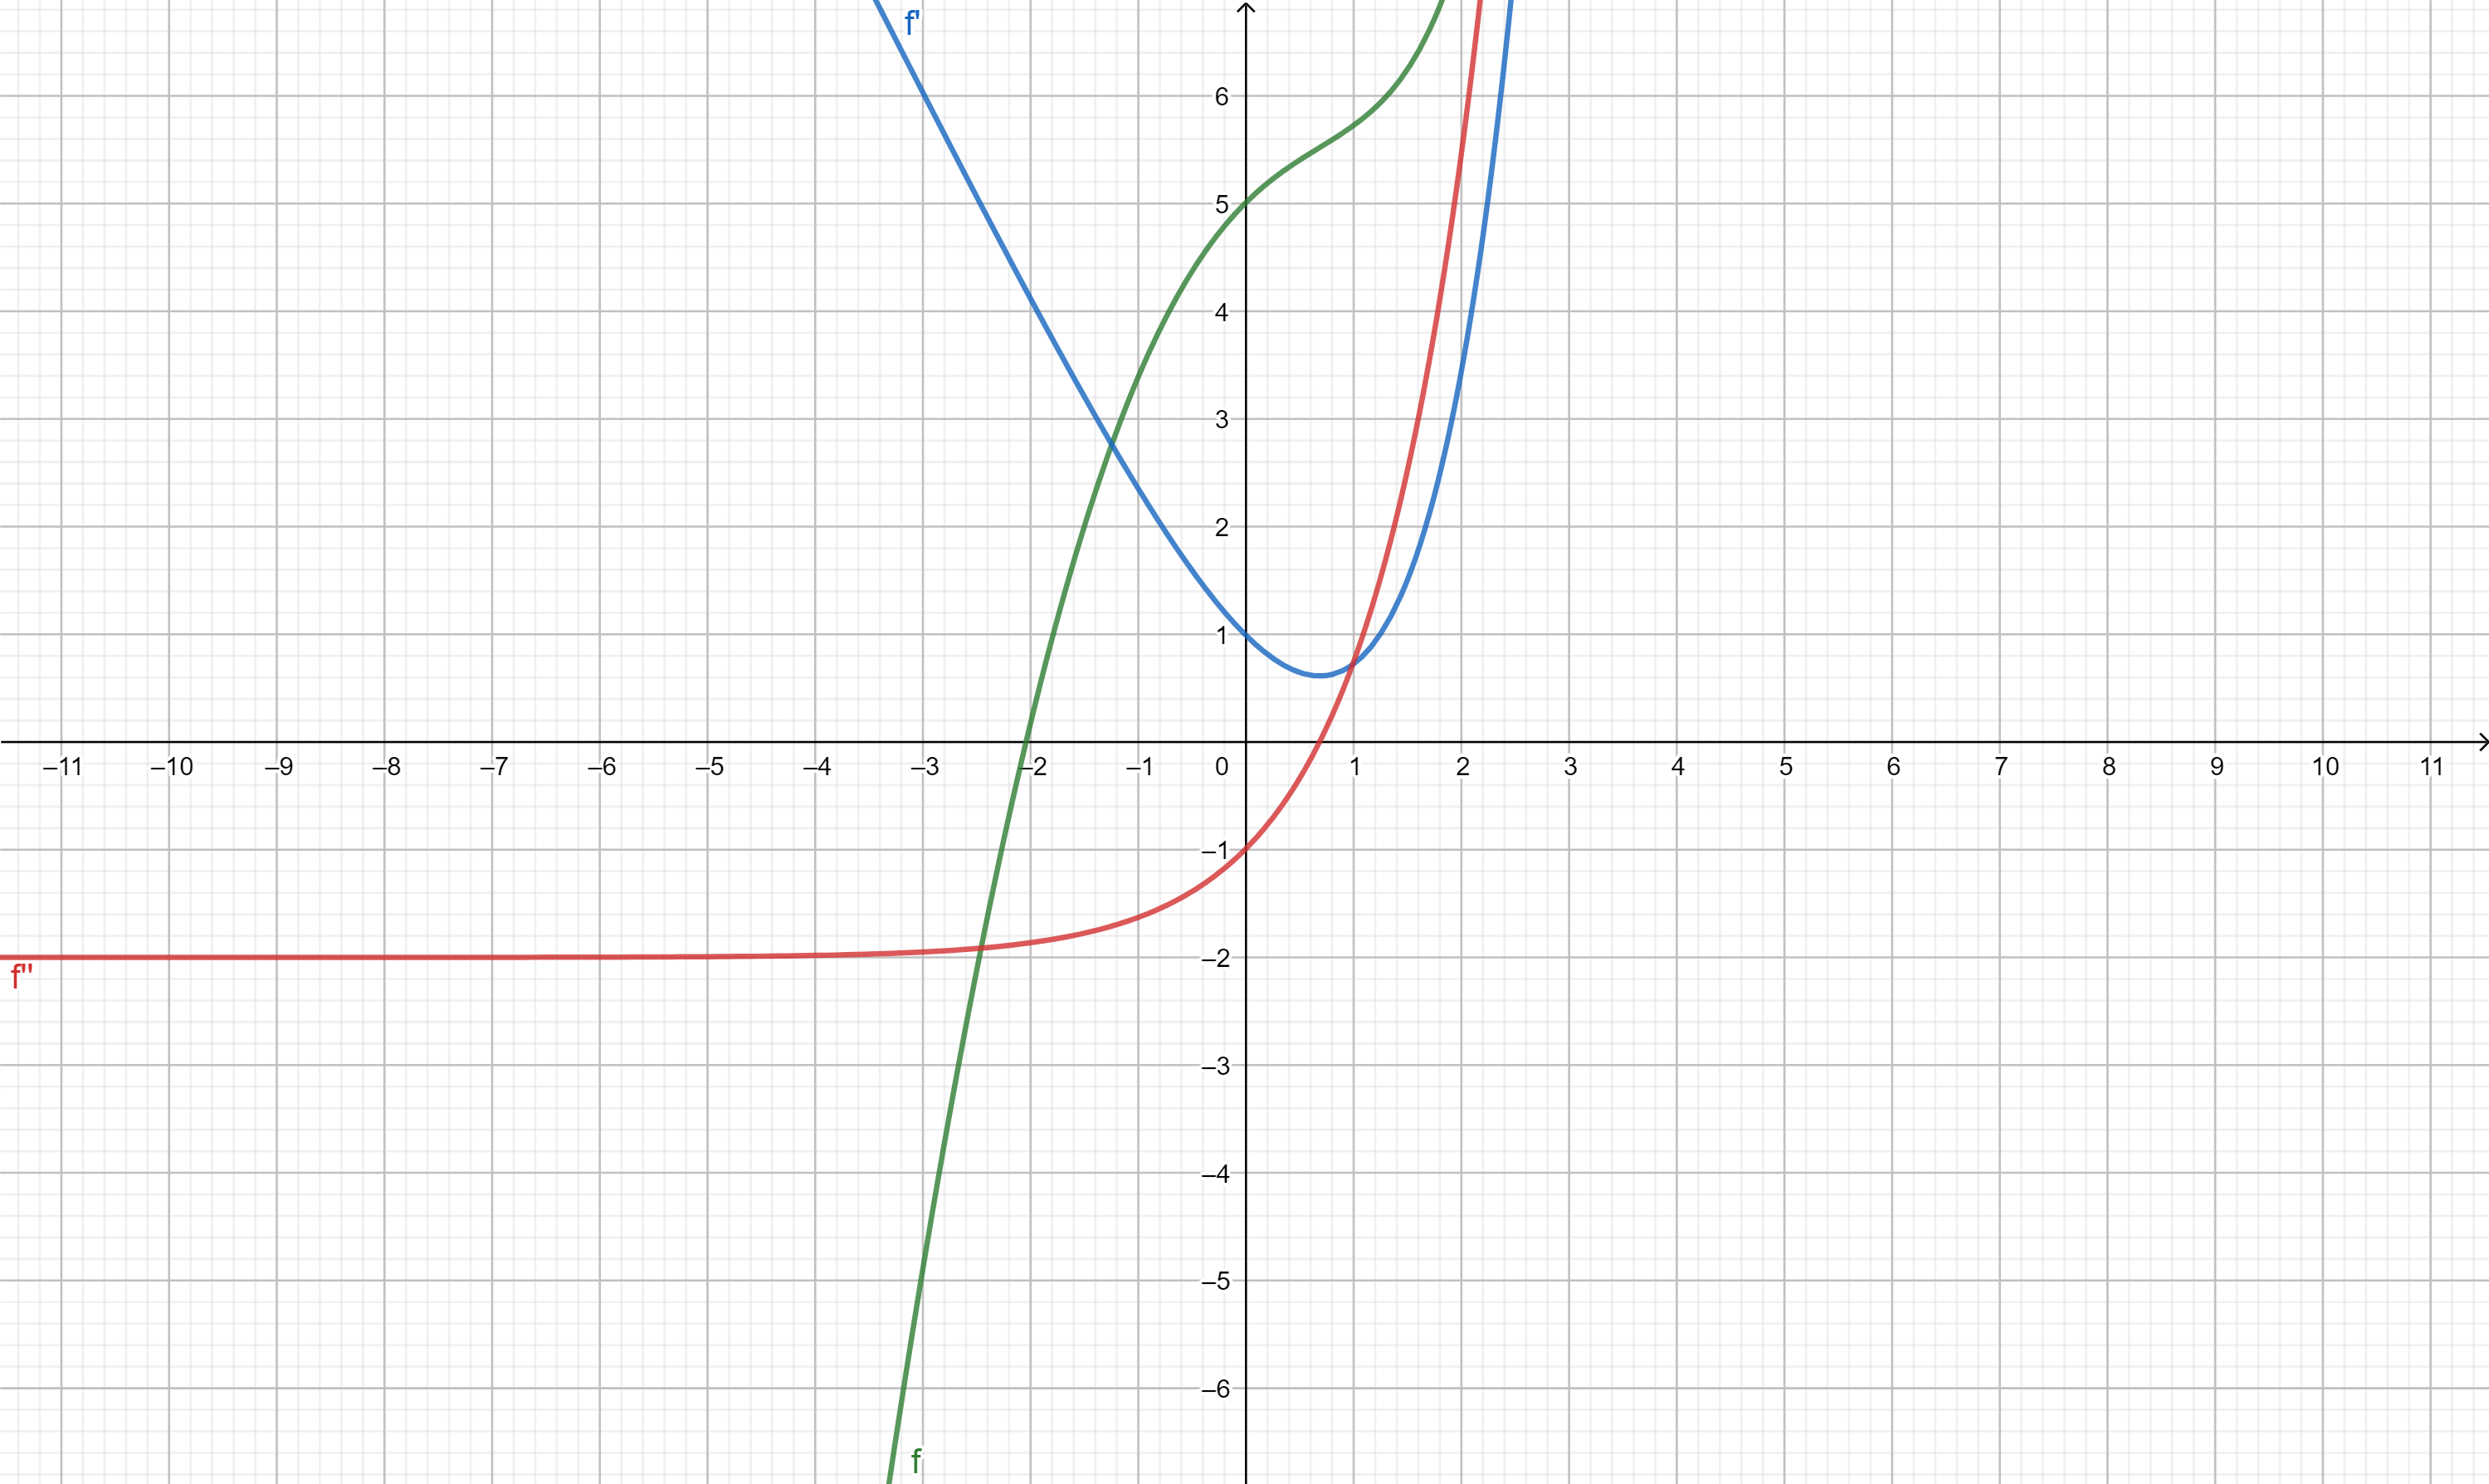

In [ ]:
def funcaoExecucao(x):
  return math.exp(x) -x**2 + 4

def derivadaFuncao(x):
  return math.exp(x) - 2*x


def segundaDerivada(x):
  return math.exp(x) - 2

In [ ]:
a = -3
b = -2

In [ ]:
resultado = bissecao(funcaoExecucao, a, b, eps=0.001, numIteracoes=11)
print("Bissecao.\nRaiz da funcao bissecao =  %.4f, f(%.4f)=%.4f" %(resultado, resultado, funcaoExecucao(resultado))) 

Bissecao: Numero aproximado de iteracoes: 9.9658
k=0 	 a0=-3.0000 	 b0=-2.0000 	 x0=-2.5000 	 f(x0)=-2.1679 	 |b-a|=1.0000 	 f(a)*f(x0) < 0? False
k=1 	 a1=-2.5000 	 b1=-2.0000 	 x1=-2.2500 	 f(x1)=-0.9571 	 |b-a|=0.5000 	 f(a)*f(x1) < 0? False
k=2 	 a2=-2.2500 	 b2=-2.0000 	 x2=-2.1250 	 f(x2)=-0.3962 	 |b-a|=0.2500 	 f(a)*f(x2) < 0? False
k=3 	 a3=-2.1250 	 b3=-2.0000 	 x3=-2.0625 	 f(x3)=-0.1268 	 |b-a|=0.1250 	 f(a)*f(x3) < 0? False
k=4 	 a4=-2.0625 	 b4=-2.0000 	 x4=-2.0312 	 f(x4)=0.0052 	 |b-a|=0.0625 	 f(a)*f(x4) < 0? True
k=5 	 a5=-2.0625 	 b5=-2.0312 	 x5=-2.0469 	 f(x5)=-0.0606 	 |b-a|=0.0312 	 f(a)*f(x5) < 0? False
k=6 	 a6=-2.0469 	 b6=-2.0312 	 x6=-2.0391 	 f(x6)=-0.0276 	 |b-a|=0.0156 	 f(a)*f(x6) < 0? False
k=7 	 a7=-2.0391 	 b7=-2.0312 	 x7=-2.0352 	 f(x7)=-0.0112 	 |b-a|=0.0078 	 f(a)*f(x7) < 0? False
k=8 	 a8=-2.0352 	 b8=-2.0312 	 x8=-2.0332 	 f(x8)=-0.0030 	 |b-a|=0.0039 	 f(a)*f(x8) < 0? False
k=9 	 a9=-2.0332 	 b9=-2.0312 	 x9=-2.0322 	 f(x9)=0.0011 	 |b-a|=0.002

In [ ]:
resultado = falsaPosicao(funcaoExecucao, a, b, eps=0.001, numIteracoes=10)
print("Falsa posicao.\nRaiz da funcao =  %.4f, f(%.4f)=%.4f" %(resultado, resultado, funcaoExecucao(resultado)) ) 

k=1 	 a1=-3.0000 	 b1=-2.0266 	 x1=-2.0266 	 f(x1)=0.0246 	 |f(x1)|=0.0246 	 f(a)*f(x1) < 0? True
k=2 	 a2=-3.0000 	 b2=-2.0314 	 x2=-2.0314 	 f(x2)=0.0044 	 |f(x2)|=0.0044 	 f(a)*f(x2) < 0? True
k=3 	 a3=-3.0000 	 b3=-2.0323 	 x3=-2.0323 	 f(x3)=0.0008 	 |f(x3)|=0.0008 	 f(a)*f(x3) < 0? True
Falsa posicao.
Raiz da funcao =  -2.0323, f(-2.0323)=0.0008


In [ ]:
resultado = newtonRaphson(funcaoExecucao, derivadaFuncao, segundaDerivada, a, b, eps=0.001, numIteracoes=10)

if resultado != None:
  print("Newton Raphson.\nRaiz da funcao =  %.4f, f(%.4f)=%.4f" %(resultado, resultado, funcaoExecucao(resultado)) ) 

Newton Raphson.
Nao foi possivel definir o valor de x0 utilizando os extremos do intervalo dado.
Nao foi atendida a expressao f'(x)*f''(x)>0
Tente novamente
